In [17]:
# Import Libraries

import optuna
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the training dataset

df = pd.read_csv('Housing_dataset_train.csv')

# Exploration

In [16]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [8]:
df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [7]:
df.describe(include=['O'])

,loc,title
count,12187,12278
unique,36,10
top,Kaduna,Flat
freq,370,1372


In [5]:
df.corr()

/tmp/ipykernel_2781/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,bedroom,bathroom,parking_space,price
ID,1.000000,0.230474,0.345121,0.165160,0.167093
bedroom,0.230474,1.000000,0.227417,0.111095,0.529145
bathroom,0.345121,0.227417,1.000000,0.178497,0.221544
parking_space,0.165160,0.111095,0.178497,1.000000,0.109211
price,0.167093,0.529145,0.221544,0.109211,1.000000


/tmp/ipykernel_2781/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

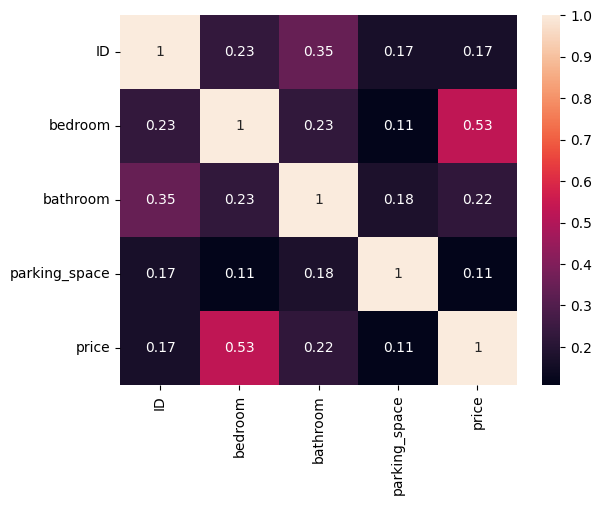

In [11]:
sns.heatmap(df.corr(), annot=True)

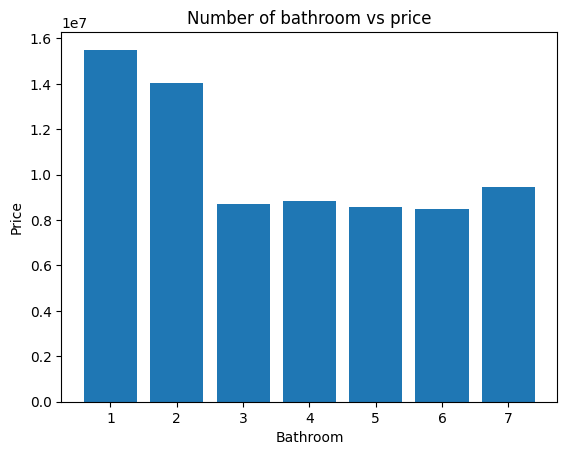

In [21]:
plt.bar(df['bathroom'],df['price'])
plt.title('Number of bathroom vs price')
plt.ylabel('Price')
plt.xlabel('Bathroom')
plt.show()

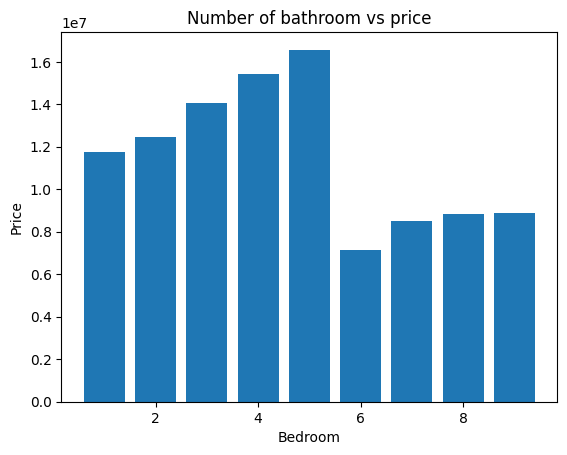

In [22]:
plt.bar(df['bedroom'],df['price'])
plt.title('Number of bedroom vs price')
plt.ylabel('Price')
plt.xlabel('Bedroom')
plt.show()

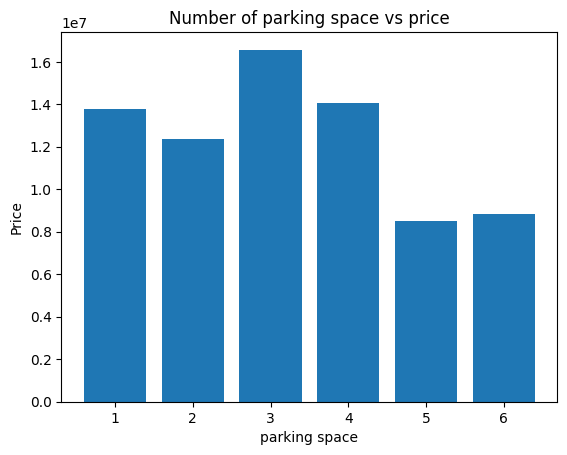

In [27]:
plt.bar(df['parking_space'],df['price'])
plt.title('Number of parking space vs price')
plt.ylabel('Price')
plt.xlabel('parking space')
plt.show()

#### Task
* Take care of categorical variables
* Fill missing values

In [28]:
df = pd.get_dummies(columns=['loc','title'], data=df)

In [29]:
df.fillna(0, inplace=True)

# Split the data into X input and Y output

In [30]:
x = df.drop(columns = ['price'], axis=1)
y = df.price

# Define training and testing set

In [31]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20, random_state=4)

In [32]:
model = xgb.XGBRegressor()

In [33]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
y_pred = model.predict(x_test)

In [35]:
mean_absolute_error(y_test, y_pred)

280271.84252991073

In [34]:
def objective(trial):
    df = pd.read_csv('Housing_dataset_train.csv')
    df = pd.get_dummies(columns=['loc','title'], data=df)
    df.fillna(0, inplace=True)
    x = df.drop(columns=['price'], axis=1)
    y = df.price
    
    
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.2, random_state=4)
    
    
    booster = trial.suggest_categorical('booster', ['gbtree'])
    reg_lambda = trial.suggest_float('lambda', 1e-8, 10.0)
    alpha = trial.suggest_float('alpha', 1e-8, 10.0)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    eta = trial.suggest_float('eta', 1e-8, 1.0)
    gamma= trial.suggest_float('gamma', 1e-8, 1.0)
    grow_policy = trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    min_child_weight = trial.suggest_float('min_child_weight', 1e-8, 10.0)
    subsample = trial.suggest_float('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 1.0)
    colsample_bylevel = trial.suggest_float('colsample_bylevel', 0.1, 1.0)
    colsample_bynode = trial.suggest_float('colsample_bynode', 0.1, 1.0)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
        
    
    
    pipe = xgb.XGBRegressor(
                         grow_policy=grow_policy,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         colsample_bynode=colsample_bynode,
                            n_estimators= n_estimators,
                             learning_rate=learning_rate,
                     booster=booster,
                         alpha=alpha,
                         max_depth=max_depth,
                         eta=eta,gamma=gamma,
                     )
    
    pipe.fit(x_train, y_train)
    
    y_pred = pipe.predict(x_test)
    
    return mean_absolute_error(y_test, y_pred)

study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=100)
    

[I 2023-08-03 22:28:00,851] A new study created in memory with name: no-name-fe9ee583-4309-49ae-99bd-8b7df5dc65d7
[I 2023-08-03 22:28:02,339] Trial 0 finished with value: 412637.24919482146 and parameters: {'booster': 'gbtree', 'lambda': 9.54538123084155, 'alpha': 4.089824362913774, 'max_depth': 2, 'eta': 0.7629307961244451, 'gamma': 0.572410390157014, 'grow_policy': 'lossguide', 'min_child_weight': 0.30748450653067394, 'subsample': 0.5824922939611722, 'colsample_bytree': 0.20887690227571187, 'colsample_bylevel': 0.5693140605468586, 'colsample_bynode': 0.5248836150295958, 'learning_rate': 0.028012830875254878, 'n_estimators': 588}. Best is trial 0 with value: 412637.24919482146.
[I 2023-08-03 22:28:05,735] Trial 1 finished with value: 300443.29413239285 and parameters: {'booster': 'gbtree', 'lambda': 0.1706566121883373, 'alpha': 2.9110486570934873, 'max_depth': 20, 'eta': 0.48280361993299387, 'gamma': 0.18624544435747534, 'grow_policy': 'depthwise', 'min_child_weight': 6.89900545980401

[I 2023-08-03 22:29:07,950] Trial 14 finished with value: 295851.13425517856 and parameters: {'booster': 'gbtree', 'lambda': 1.7825628608917965, 'alpha': 4.399222961232775, 'max_depth': 8, 'eta': 0.8632961762641758, 'gamma': 0.003986591741047207, 'grow_policy': 'depthwise', 'min_child_weight': 5.10251647252724, 'subsample': 0.3120684310299754, 'colsample_bytree': 0.4085563592125143, 'colsample_bylevel': 0.4142158308332024, 'colsample_bynode': 0.3248710670310683, 'learning_rate': 0.07501845742461531, 'n_estimators': 292}. Best is trial 2 with value: 274529.0956500357.
[I 2023-08-03 22:29:14,429] Trial 15 finished with value: 286496.78167110716 and parameters: {'booster': 'gbtree', 'lambda': 4.717534244868388, 'alpha': 1.9360213825371875, 'max_depth': 12, 'eta': 0.9914554168120976, 'gamma': 0.44985897421849036, 'grow_policy': 'depthwise', 'min_child_weight': 2.243297819927201, 'subsample': 0.10353591135289283, 'colsample_bytree': 0.6343128651816735, 'colsample_bylevel': 0.983644461515835

[I 2023-08-03 22:29:57,009] Trial 28 finished with value: 292066.86007619643 and parameters: {'booster': 'gbtree', 'lambda': 0.5550408640255946, 'alpha': 1.7257450756278208, 'max_depth': 9, 'eta': 0.9210162769020361, 'gamma': 0.006742094922907865, 'grow_policy': 'depthwise', 'min_child_weight': 8.033270584694016, 'subsample': 0.37542646554300296, 'colsample_bytree': 0.5031127015158807, 'colsample_bylevel': 0.44397327413069465, 'colsample_bynode': 0.16749125036884452, 'learning_rate': 0.09264112555156974, 'n_estimators': 930}. Best is trial 21 with value: 272793.08322194644.
[I 2023-08-03 22:29:58,988] Trial 29 finished with value: 283134.29175983934 and parameters: {'booster': 'gbtree', 'lambda': 1.2901511523572875, 'alpha': 0.9931226621339025, 'max_depth': 3, 'eta': 0.7588708449618891, 'gamma': 0.3558827560541116, 'grow_policy': 'depthwise', 'min_child_weight': 5.337779146979361, 'subsample': 0.5879805514441969, 'colsample_bytree': 0.23100181282894217, 'colsample_bylevel': 0.557567055

[I 2023-08-03 22:30:58,217] Trial 42 finished with value: 273596.33729491074 and parameters: {'booster': 'gbtree', 'lambda': 6.128479213699357, 'alpha': 1.677846947998988, 'max_depth': 19, 'eta': 0.8517879105658441, 'gamma': 0.21766286394772494, 'grow_policy': 'lossguide', 'min_child_weight': 3.9527327986846563, 'subsample': 0.507561882265508, 'colsample_bytree': 0.3898872740037075, 'colsample_bylevel': 0.4129649947195574, 'colsample_bynode': 0.5783764308058286, 'learning_rate': 0.0354628333706471, 'n_estimators': 634}. Best is trial 38 with value: 271025.0296938571.
[I 2023-08-03 22:31:04,668] Trial 43 finished with value: 272728.17314825003 and parameters: {'booster': 'gbtree', 'lambda': 5.616444658098548, 'alpha': 0.8051914112050429, 'max_depth': 19, 'eta': 0.711445543389497, 'gamma': 0.2689597298627878, 'grow_policy': 'lossguide', 'min_child_weight': 4.6350983722719175, 'subsample': 0.530602330381766, 'colsample_bytree': 0.4425207518975695, 'colsample_bylevel': 0.3489888718510372, 

[I 2023-08-03 22:32:33,253] Trial 56 finished with value: 267867.44540814287 and parameters: {'booster': 'gbtree', 'lambda': 8.390421463268659, 'alpha': 0.011188481476366197, 'max_depth': 16, 'eta': 0.6485947002299147, 'gamma': 0.410727726722776, 'grow_policy': 'lossguide', 'min_child_weight': 1.7402314953544338, 'subsample': 0.8015377901371841, 'colsample_bytree': 0.5299268435037997, 'colsample_bylevel': 0.24526624228834618, 'colsample_bynode': 0.7972213249346478, 'learning_rate': 0.015558422896229144, 'n_estimators': 744}. Best is trial 56 with value: 267867.44540814287.
[I 2023-08-03 22:32:40,941] Trial 57 finished with value: 268160.4474364643 and parameters: {'booster': 'gbtree', 'lambda': 8.633257771058386, 'alpha': 0.042950758058049376, 'max_depth': 16, 'eta': 0.4905590319202658, 'gamma': 0.401100513548707, 'grow_policy': 'lossguide', 'min_child_weight': 1.4937203673841295, 'subsample': 0.7879471999653234, 'colsample_bytree': 0.5274461928936779, 'colsample_bylevel': 0.2440329265

[I 2023-08-03 22:34:21,918] Trial 70 finished with value: 267992.23561317864 and parameters: {'booster': 'gbtree', 'lambda': 9.145544064682788, 'alpha': 0.28767647345392094, 'max_depth': 14, 'eta': 0.6140527143165921, 'gamma': 0.47680010900451303, 'grow_policy': 'lossguide', 'min_child_weight': 0.06463538871868457, 'subsample': 0.7506422708609599, 'colsample_bytree': 0.5629099555688213, 'colsample_bylevel': 0.19243899379380697, 'colsample_bynode': 0.7764680598754847, 'learning_rate': 0.017579146820718997, 'n_estimators': 821}. Best is trial 61 with value: 267128.5353975536.
[I 2023-08-03 22:34:28,998] Trial 71 finished with value: 270814.8808429643 and parameters: {'booster': 'gbtree', 'lambda': 9.947999386059784, 'alpha': 0.3583416446664747, 'max_depth': 14, 'eta': 0.6141703818725603, 'gamma': 0.48614861589266656, 'grow_policy': 'lossguide', 'min_child_weight': 1.0819643332946747, 'subsample': 0.7543497145123552, 'colsample_bytree': 0.5396696013454657, 'colsample_bylevel': 0.201817991

[I 2023-08-03 22:36:04,385] Trial 84 finished with value: 262867.44490664284 and parameters: {'booster': 'gbtree', 'lambda': 7.627266744890348, 'alpha': 1.5605277072071821, 'max_depth': 11, 'eta': 0.3876082821028767, 'gamma': 0.38040982035185344, 'grow_policy': 'lossguide', 'min_child_weight': 0.2557036476021298, 'subsample': 0.8285237445614773, 'colsample_bytree': 0.6045993908252514, 'colsample_bylevel': 0.17237366310512292, 'colsample_bynode': 0.8875666467766758, 'learning_rate': 0.019823408207390432, 'n_estimators': 969}. Best is trial 84 with value: 262867.44490664284.
[I 2023-08-03 22:36:11,803] Trial 85 finished with value: 264615.9964441429 and parameters: {'booster': 'gbtree', 'lambda': 7.605102744361886, 'alpha': 2.2038895511091745, 'max_depth': 11, 'eta': 0.37885681828144413, 'gamma': 0.384765429167215, 'grow_policy': 'lossguide', 'min_child_weight': 0.34363295235268504, 'subsample': 0.8397722085923688, 'colsample_bytree': 0.615387369270532, 'colsample_bylevel': 0.16685193173

[I 2023-08-03 22:37:44,048] Trial 98 finished with value: 263653.02553885715 and parameters: {'booster': 'gbtree', 'lambda': 7.244483533291689, 'alpha': 2.844268884370387, 'max_depth': 10, 'eta': 0.4363802349205821, 'gamma': 0.3074852897921679, 'grow_policy': 'lossguide', 'min_child_weight': 0.23442163434894078, 'subsample': 0.9074864282538619, 'colsample_bytree': 0.6268322143732903, 'colsample_bylevel': 0.17870400576188913, 'colsample_bynode': 0.8935392384271993, 'learning_rate': 0.031281322691861985, 'n_estimators': 920}. Best is trial 84 with value: 262867.44490664284.
[I 2023-08-03 22:37:50,733] Trial 99 finished with value: 264493.53624971426 and parameters: {'booster': 'gbtree', 'lambda': 7.199741878541479, 'alpha': 2.2936022267229776, 'max_depth': 10, 'eta': 0.3956262713015299, 'gamma': 0.3064853563807958, 'grow_policy': 'lossguide', 'min_child_weight': 0.14157973544790903, 'subsample': 0.9125141880965814, 'colsample_bytree': 0.6270782246792223, 'colsample_bylevel': 0.1770011340

In [35]:
print(study.best_params)
print(study.best_value)

{'booster': 'gbtree', 'lambda': 7.627266744890348, 'alpha': 1.5605277072071821, 'max_depth': 11, 'eta': 0.3876082821028767, 'gamma': 0.38040982035185344, 'grow_policy': 'lossguide', 'min_child_weight': 0.2557036476021298, 'subsample': 0.8285237445614773, 'colsample_bytree': 0.6045993908252514, 'colsample_bylevel': 0.17237366310512292, 'colsample_bynode': 0.8875666467766758, 'learning_rate': 0.019823408207390432, 'n_estimators': 969}
262867.44490664284


In [36]:
tuned_model = xgb.XGBRegressor(booster =  'gbtree',
                        alpha =  3.880913329849644,
                        max_depth =  7,
                        eta =  0.9991033854315745,
                        gamma =  0.16724205034393075,
                        grow_policy =  'depthwise',
                        min_child_weight =  7.699305089019536,
                        subsample =   0.7803361498388217,
                        colsample_bytree =  0.789809523440635,
                        colsample_bylevel =  0.8106376600450586,
                        colsample_bynode =  0.4775642191851874,
                        learning_rate =  0.043136154899211306,
                        n_estimators =  483)

In [37]:
tuned_model.fit(x_train, y_train)
y_pred = tuned_model.predict(x_test)
mean_absolute_error(y_test, y_pred)

264119.4024336607

The tunned model did better on the dataset

In [40]:
tuned_model.fit(x,y)

XGBRegressor(alpha=3.880913329849644, base_score=None, booster='gbtree',
             callbacks=None, colsample_bylevel=0.8106376600450586,
             colsample_bynode=0.4775642191851874,
             colsample_bytree=0.789809523440635, early_stopping_rounds=None,
             enable_categorical=False, eta=0.9991033854315745, eval_metric=None,
             feature_types=None, gamma=0.16724205034393075, gpu_id=None,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, learning_rate=0.043136154899211306,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=7.699305089019536, missing=nan,
             monotone_constraints=None, n_estimators=483, n_jobs=None,
             num_parallel_tree=None, ...)

# Testing Set

In [41]:
test = pd.read_csv('Housing_dataset_test.csv')
test = pd.get_dummies(columns=['loc','title'], data=test)
df.fillna(0, inplace=True)
test['price'] = tuned_model.predict(test)

In [42]:
sub = test[['ID', 'price']]
sub.to_csv('sub4.csv', index=False)

<AxesSubplot: >

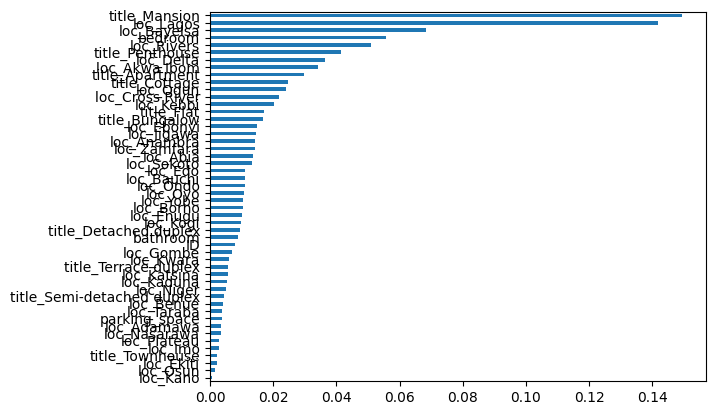

In [46]:
pd.Series(tuned_model.feature_importances_,
          index=x.columns).sort_values().plot(kind='barh')

In [62]:
df = pd.read_csv('Housing_dataset_train.csv')

In [63]:
geo_pol = {
    'North_central':['Benue','Kogi','Kwara', 'Nasarawa','Niger','Plateau'],
    'North_east':['Adamawa','Gombe','Yobe','Borno','Taraba','Bauchi'],
    'North_west':['Sokoto','Kebbi','Zamfara','Katsina','Kaduna','Kano','Jigawa'],
    'South_east':['Abia','Anambra','Ebonyi','Enugun','Imo'],
    'South_south':['Akwa Ibom','Bayelsa','Cross River','Delta','Edo','Rivers'],
    'South_west':['Ekiti','Lagos','Ogun','Ondo','Oyo','Osun']
}

In [64]:
def get_regions(city):
    for region,state in geo_pol.items():
        if city in state:
            return region
        
df['region'] = df['loc'].apply(get_regions)

In [65]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,region
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,North_west
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,South_west
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,South_west
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,South_east
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,North_central


In [66]:
df = pd.get_dummies(columns=['loc','title','region'], data=df)

In [67]:
df.fillna(0, inplace=True)

In [68]:
x = df.drop(columns = ['price'], axis=1)
y = df.price

In [69]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=.20, random_state=4)

In [70]:
tuned_model = xgb.XGBRegressor(booster =  'gbtree',
                        alpha =  3.880913329849644,
                        max_depth =  7,
                        eta =  0.9991033854315745,
                        gamma =  0.16724205034393075,
                        grow_policy =  'depthwise',
                        min_child_weight =  7.699305089019536,
                        subsample =   0.7803361498388217,
                        colsample_bytree =  0.789809523440635,
                        colsample_bylevel =  0.8106376600450586,
                        colsample_bynode =  0.4775642191851874,
                        learning_rate =  0.043136154899211306,
                        n_estimators =  483)

In [71]:
tuned_model.fit(x_train, y_train)
y_pred = tuned_model.predict(x_test)
mean_absolute_error(y_test, y_pred)

261434.4169989643

# Testing set

In [73]:
test = pd.read_csv('Housing_dataset_test.csv')
geo_pol = {
    'North_central':['Benue','Kogi','Kwara', 'Nasarawa','Niger','Plateau'],
    'North_east':['Adamawa','Gombe','Yobe','Borno','Taraba','Bauchi'],
    'North_west':['Sokoto','Kebbi','Zamfara','Katsina','Kaduna','Kano','Jigawa'],
    'South_east':['Abia','Anambra','Ebonyi','Enugun','Imo'],
    'South_south':['Akwa Ibom','Bayelsa','Cross River','Delta','Edo','Rivers'],
    'South_west':['Ekiti','Lagos','Ogun','Ondo','Oyo','Osun']
}
def get_regions(city):
    for region,state in geo_pol.items():
        if city in state:
            return region
        
test['region'] = test['loc'].apply(get_regions)

In [74]:
test = pd.get_dummies(columns=['loc','title','region'], data=test)
df.fillna(0, inplace=True)
test['price'] = tuned_model.predict(test)

In [75]:
sub = test[['ID', 'price']]
sub.to_csv('submited.csv', index=False)